In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
pd.set_option('display.max_rows', 8)
!whoami
!date

%load_ext autoreload
%autoreload 2

alibow
Tue Jan  5 08:34:39 PST 2021


# Lung cancer screening gaps (days)

In [2]:
%cd /home/j/Project/simulation_science/cancer/market_scan_data/lung_cancer/
!ls *outpatient*

/snfs1/Project/simulation_science/cancer/market_scan_data/lung_cancer
2016_outpatient_mdcr.csv     2017_outpatient_mdcr.csv
2016_outpatient_nonmdcr.csv  2017_outpatient_nonmdcr.csv


In [3]:
def merge_data(year: int):
    """merge medicare and nonmedicare outpatient screening records"""
    df_mdcr = pd.read_csv(f'{year}_outpatient_mdcr.csv').query('age > 65')
    df_non_mdcr = pd.read_csv(f'{year}_outpatient_nonmdcr.csv')
    
    return pd.concat([df_mdcr, df_non_mdcr], ignore_index=True)

In [4]:
df_2016 = merge_data(2016)
df_2017 = merge_data(2017)

In [5]:
patient_ids = set(df_2016.enrolid) & set(df_2017.enrolid)
len(patient_ids)

1475

In [6]:
t1 = df_2016[df_2016.enrolid.isin(patient_ids)].groupby('enrolid').svcdate.last()
t1

enrolid
2.704370e+07    2016-02-18
3.259210e+07    2016-12-02
3.318330e+07    2016-02-15
9.778970e+07    2016-06-15
                   ...    
3.294218e+10    2016-11-08
3.296201e+10    2016-11-01
3.298375e+10    2016-01-28
3.299572e+10    2016-12-16
Name: svcdate, Length: 1475, dtype: object

In [7]:
t2 = df_2017[df_2017.enrolid.isin(patient_ids)].groupby('enrolid').svcdate.first()
t2

enrolid
27043701       2017-07-06
32592101       2017-12-20
33183302       2017-03-30
97789701       2017-08-02
                  ...    
32942175102    2017-03-08
32962007301    2017-11-08
32983748901    2017-05-05
32995720601    2017-02-24
Name: svcdate, Length: 1475, dtype: object

<AxesSubplot:>

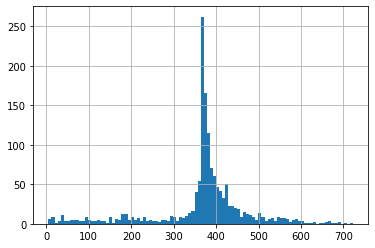

In [65]:
# Empirical distribution
delta = (pd.to_datetime(t2) - pd.to_datetime(t1)) / pd.Timedelta(days=1)
delta.hist(bins=100)

In [9]:
delta.mean()

367.3437288135593

In [10]:
delta.std()

109.07222760225942

<AxesSubplot:>

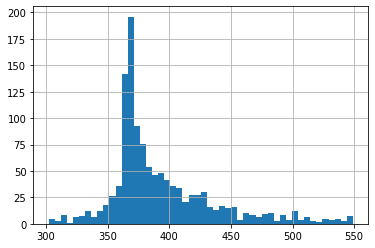

In [67]:
#truncated_delta = delta.loc[delta < (delta.mean() + delta.std())].loc[delta > (delta.mean() - delta.std())]
truncated_delta = delta.loc[delta < 550].loc[delta > 300]

truncated_delta.hist(bins=50)

In [68]:
truncated_delta.describe(percentiles=[0.025,0.975])

count    1201.000000
mean      393.353872
std        43.345632
min       302.000000
2.5%      333.000000
50%       378.000000
97.5%     513.000000
max       549.000000
Name: svcdate, dtype: float64

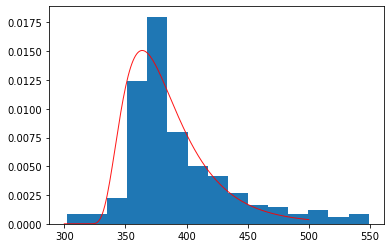

median: 377.0 2.5%: 339.5190714447906 97.5%: 476.86449569317386


In [271]:
# distribution for the cost of BEP
import scipy.stats
s = 0.5
loc = 317
scale = 60

fig, ax = plt.subplots(1,1)
x = np.linspace(300, 500, 200)

ax.plot(x, scipy.stats.lognorm.pdf(x, s, loc, scale), 'r-', lw=1, alpha=0.9, label='beta pdf')
ax.hist(truncated_delta, density=True, bins=15)
plt.show()

print('median:', scipy.stats.lognorm.ppf(0.5, s, loc, scale),
      '2.5%:', scipy.stats.lognorm.ppf(0.025, s, loc, scale),
      '97.5%:', scipy.stats.lognorm.ppf(0.975, s, loc, scale))

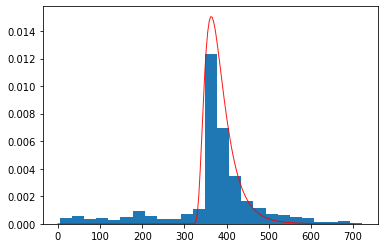

LOGNORMAL DIST 
 median: 377.0 2.5%: 339.5190714447906 97.5%: 476.86449569317386 EMPIRICAL DIST mean and median: 367.3437288135593 and 374.0


In [266]:
# distribution for the cost of BEP
import scipy.stats
s = 0.5
loc = 317
scale = 60

fig, ax = plt.subplots(1,1)
x = np.linspace(0, 700, 200)

ax.plot(x, scipy.stats.lognorm.pdf(x, s, loc, scale), 'r-', lw=1, alpha=0.9, label='beta pdf')
ax.hist(delta, density=True, bins=25)
plt.show()

print('LOGNORMAL DIST \n median:', scipy.stats.lognorm.ppf(0.5, s, loc, scale),
      '2.5%:', scipy.stats.lognorm.ppf(0.025, s, loc, scale),
      '97.5%:', scipy.stats.lognorm.ppf(0.975, s, loc, scale),
     
     'EMPIRICAL DIST mean and median:', delta.mean(), 'and', delta.median())

In [264]:
# sample value from lognorm dist
scipy.stats.lognorm.rvs(s, loc, scale)

368.13676418666967